## load packages

In [7]:
from sklearn.metrics import confusion_matrix
import load_data
import my_metrics
import plot_learning_curve
import numpy as np
import sys 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from xgboost import XGBClassifier
import pandas as pd
from sklearn import metrics
from sklearn import tree
import matplotlib.pyplot as plt 
from sklearn.metrics import f1_score, precision_score, recall_score
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib as mpl

%matplotlib inline

In [8]:
lev_name = [117,138,162,191,226,268,316,374,441,521,607,689,761,819,858,886,912,936,957,976,993]

In [10]:
#dilute_cape = np.loadtxt("../../data/goamazon/dilute_cape")
#dilute_dcape = np.loadtxt("../../data/goamazon/dilute_dcape")
#undilute_dcape = np.loadtxt("../../data/goamazon/undilute_dcape")
#undilute_cape = np.loadtxt("../../data/goamazon/undilute_cape")
#undilute_cape = np.loadtxt("/global/homes/z/zhangtao/tmp/goamazon_dc.txt")
#undilute_cape = np.loadtxt("/global/homes/z/zhangtao/ML_trigger/calc_cape/scam_offline/goamazon_dilute_dcape.txt")

dilute_cape = np.loadtxt("/home/tzhang/ML_trigger/calc_cape/scam_offline/goamazon_dilute_cape_tiedke_0.5.txt")
dilute_dcape = np.loadtxt("/home/tzhang/ML_trigger/calc_cape/scam_offline/goamazon_dilute_dcape_tiedke_0.5.txt")
undilute_cape = np.loadtxt("/home/tzhang/ML_trigger/calc_cape/scam_offline/goamazon_undilute_cape_tiedke_0.5.txt")
undilute_dcape = np.loadtxt("/home/tzhang/ML_trigger/calc_cape/scam_offline/goamazon_undilute_dcape_tiedke_0.5.txt")

#dilute_dcape = np.loadtxt("/global/homes/z/zhangtao/ML_trigger/calc_cape/scam_offline/goamazon_dilute_dcape_2.txt")
#undilute_dcape = np.loadtxt("/global/homes/z/zhangtao/ML_trigger/calc_cape/scam_offline/goamazon_undilute_dcape_2.txt")

lcl = np.loadtxt("/home/tzhang/ML_trigger/ML/data//goamazon_dilute_lcl")

dataset = load_data.load_arm_hy("/home/tzhang/ML_trigger/ML/data/","trigger_goamazon_hy.nc")

dataset['cape'] = dilute_dcape
dataset['lcl'] = lcl
print(dataset.shape)

dataset.rename(columns={'cape': 'ddcape'}, inplace=True)

pos = dataset[dataset.label==1]
neg = dataset[dataset.label==0]
print(pos.shape)
print(neg.shape)

trig_x = dataset.iloc[:,0:86]
trig_y = dataset.iloc[:,86]

print(trig_x.shape)

print(np.sum(trig_y))
trig_x_train,trig_x_test,trig_y_train,trig_y_test= train_test_split(trig_x, trig_y, test_size=0.2, random_state=20)


(5840, 92)
(935, 92)
(4905, 92)
(5840, 86)
935.0


nan


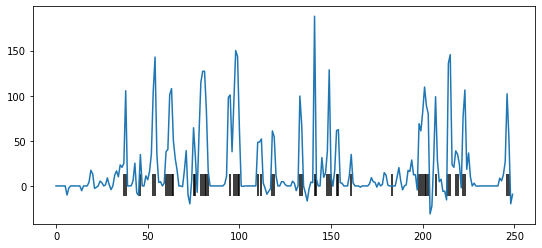

In [5]:
real_trigger = np.zeros(5840)
for i in range(5840):
    if dataset.loc[i,'PRECT'] > 0.5:
        real_trigger[i] = 1
    else:
        real_trigger[i] = np.nan

print(sum(real_trigger))
fig, ax = plt.subplots(1,1,figsize=(9,4))
ax.scatter(range(250),real_trigger[:250],color='k', marker='|',s=500)
ax.plot(range(250), dataset.loc[:250-1,'ddcape'])

### xgboost

In [11]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)

f1_scores = cross_val_score(xgb, trig_x, trig_y, cv=cv, scoring="f1_macro")
print(f1_scores)
print(f1_scores.mean())

NameError: name 'xgb' is not defined

In [12]:
xgb = XGBClassifier(n_estimators=600,silent=True, nthread=8, max_depth=7,scale_pos_weight=3.5)
xgb.fit(trig_x_train,trig_y_train)
trig_y_pred = xgb.predict(trig_x_test)
tn, fp, fn, tp = confusion_matrix(trig_y_test, trig_y_pred).ravel()
f1 = f1_score(trig_y_test, trig_y_pred,average='macro')
p  = precision_score(trig_y_test, trig_y_pred,average='macro')
r  = recall_score(trig_y_test, trig_y_pred,average='macro')

print(tp, fp, fn, tn)
print(f1, p, r)

[03:04:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1598185621802/work/src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


173 19 24 952
0.9336874474341251 0.9382257513661202 0.9293025663008987


In [52]:
cape_trigger = np.zeros(trig_y_test.shape)

print(trig_x_test.shape)

for i in range(len(trig_y_test)):
    if trig_x_test.iloc[i,4] > 70:
        cape_trigger[i] = 1

tn, fp, fn, tp = confusion_matrix(trig_y_test, cape_trigger).ravel()
f1 = f1_score(trig_y_test, cape_trigger,average='macro')
p  = precision_score(trig_y_test, cape_trigger,average='macro')
r  = recall_score(trig_y_test, cape_trigger,average='macro')

print(tp,fp,fn,tn)
print(f1, p, r)

(1168, 86)
42 109 155 862
0.5542912648303615 0.5628683245749413 0.5504712813730155


|          | TP  | FP  | FN  | TN  |  F1  |  P   |  R   |
|----------|-----|-----|-----|-----|------|------|------|
|XGboost   | 136 |18   | 61  | 953 |0.868 |0.911 | 0.836|
|dd(0)     | 144 |149  | 53  | 822 |0.739 |0.715 | 0.789|
|dd(65)    | 93  |2    | 104 | 969 |0.793 |0.941 |0.735 |
|dc        | 26  |63   | 171 | 908 |0.534 |0.567 |0.534 |
|udd(0)    | 120 |196  | 77  | 775 |0.659 |0.645 |0.704 |
|udd(65)   | 71  |11   | 126 | 960 |0.721 |0.875 |0.675 |
|udc       | 46  |344  | 151 | 627 |0.437 |0.462 |0.440 |

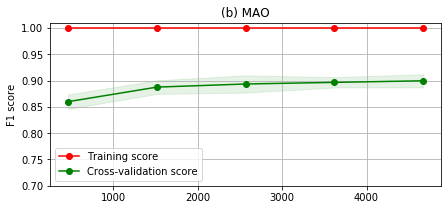

In [7]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)
title = "(b) MAO"
g = plot_learning_curve.plot_learning_curve(xgb,title,trig_x, trig_y,ylim=(0.7, 1.01), cv=cv, n_jobs=8)
plt.xlabel("")
plt.savefig("figs/goamazon_robust_sample.pdf")

<AxesSubplot:xlabel='name'>

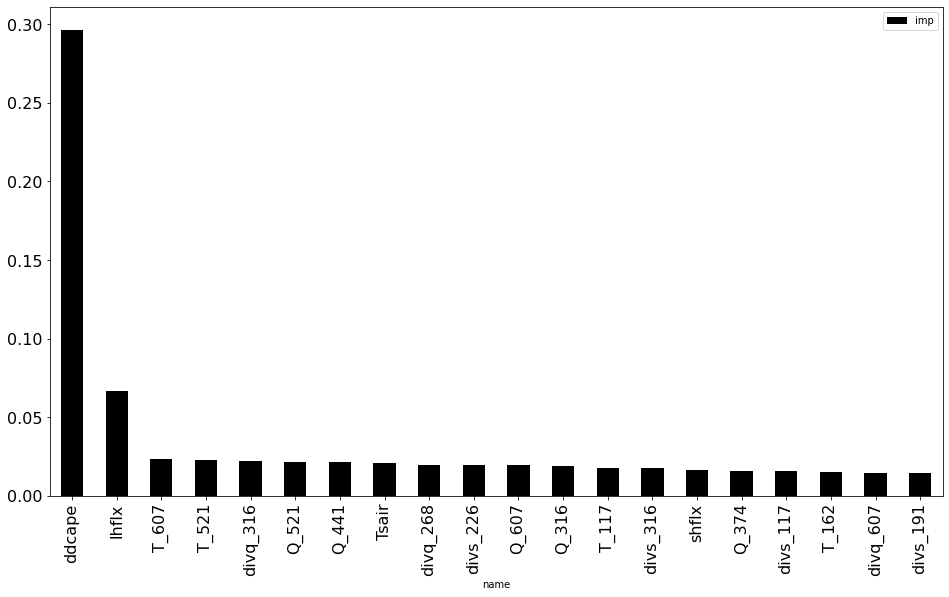

In [14]:
importance = xgb.feature_importances_
name = dataset.columns.values.tolist()
imp_df = pd.DataFrame(importance,columns=['imp'])
imp_df['name'] = name[0:86]
imp_df.set_index('name',inplace=True)
imp_df.sort_values('imp',inplace=True,ascending=False)
#print(imp_df)
imp_df.iloc[:20].plot.bar(figsize=(16,9), color='k',fontsize=16)
#plt.savefig("figs/goamazon_imp.pdf")

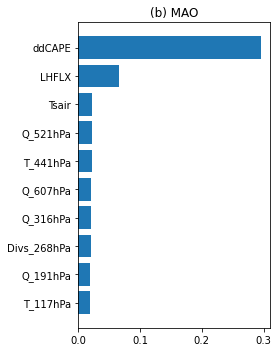

In [15]:
imp_data = imp_df.iloc[:10].values.reshape(-1)
var_name = ['ddCAPE','LHFLX','Tsair','Q_521hPa','T_441hPa','Q_607hPa','Q_316hPa','Divs_268hPa','Q_191hPa','T_117hPa']
pos = np.arange(len(var_name))

fig, ax = plt.subplots(figsize=(4,5))
ax.invert_yaxis()
ax.barh(var_name,imp_data, color="tab:blue")
ax.set_title("(b) MAO")
plt.tight_layout()
plt.savefig("figs/goamazon_imp.pdf")

['fast', 'seaborn-white', 'seaborn-ticks', 'bmh', 'seaborn-paper', 'dark_background', 'seaborn-pastel', 'seaborn-dark', 'grayscale', 'seaborn-notebook', 'tableau-colorblind10', 'ggplot', 'seaborn-deep', '_classic_test', 'fivethirtyeight', 'seaborn-dark-palette', 'seaborn', 'classic', 'seaborn-muted', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-darkgrid', 'seaborn-whitegrid', 'seaborn-talk', 'Solarize_Light2', 'seaborn-poster']


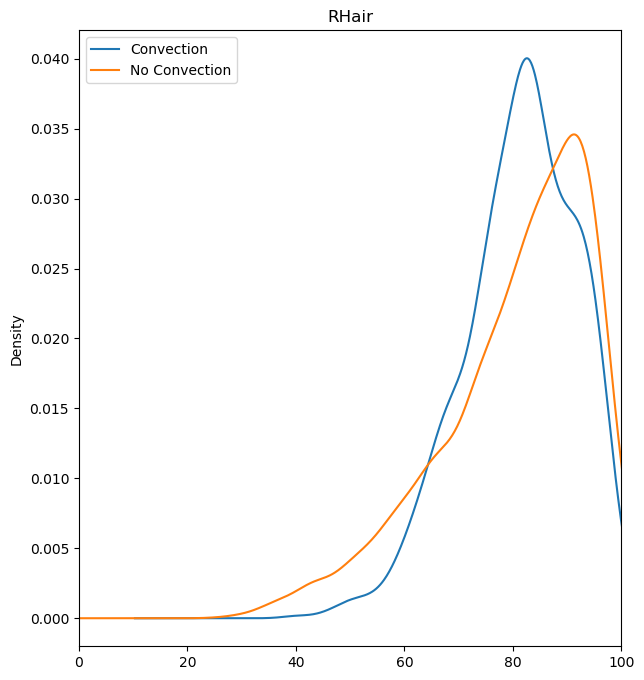

In [19]:
print(plt.style.available)

def single_factor_diag(pos, neg, name, figname):
    fac_pos = pos[name]
    fac_neg = neg[name]
    box_data = pd.concat([fac_pos, fac_neg], axis=1)
    box_data.columns = ['Convection', 'No Convection']
    #box_data.boxplot(grid=False)
    box_data.plot.kde(figsize=(7,8))
    plt.title(name)
    plt.xlim(0,100)
    plt.savefig("figs/goamazon_RHair_hist.pdf")
    #plt.savefig(figname)

plt.style.use('default')
single_factor_diag(pos, neg, 'RHair', 'RHair_hist')


In [22]:
sl = trig_x.shape[0]
train_len = int(sl * 3 / 4)+12
ts_x_train = trig_x.iloc[:train_len,:]
ts_y_train = trig_y.iloc[:train_len]
ts_x_test  = trig_x.iloc[train_len:,:]
ts_y_test  = trig_y.iloc[train_len:].tolist()
prect_test = dataset['PRECT'].iloc[train_len:]
hour_test  = dataset['hour'].iloc[train_len:]
day_test  = dataset['day'].iloc[train_len:]
mon_test  = dataset['mon'].iloc[train_len:]
year_test = dataset['year'].iloc[train_len:]

#print(year_test)
#print(mon_test)
#print(day_test)
#print(hour_test)
print(sl)
print(day_test.shape)
print(ts_y_train.shape)

xgb.fit(ts_x_train, ts_y_train)
ts_y_pred = xgb.predict(ts_x_test)

print(len(ts_y_test))

for i in range(ts_x_test.shape[0]):
    if ts_y_pred[i] == 0:
        ts_y_pred[i] = np.nan
    if ts_y_test[i] == 0:
        ts_y_test[i] = np.nan

5840
(1448,)
(4392,)
1448


In [23]:
#dilute_cape = np.loadtxt("../../data/goamazon/goamazon_dilute_cape.txt")
#dilute_dcape = np.loadtxt("../../data/goamazon/goamazon_dilute_dcape.txt")
#undilute_dcape = np.loadtxt("../../data/goamazon/goamazom_undilute_dcape.txt")
#undilute_cape = np.loadtxt("../../data/goamazon/goamazom_undilute_cape.txt")


dilute_cape_test = dilute_cape[train_len:]
dilute_dcape_test = dilute_dcape[train_len:]
undilute_dcape_test = undilute_dcape[train_len:]
undilute_cape_test = undilute_cape[train_len:]

dilute_cape_pred = np.zeros(ts_y_pred.shape)
dilute_dcape_pred = np.zeros(ts_y_pred.shape)
undilute_dcape_pred = np.zeros(ts_y_pred.shape)
undilute_cape_pred = np.zeros(ts_y_pred.shape)


for i in range(len(ts_y_pred)):
    if dilute_cape_test[i] > 70:
        dilute_cape_pred[i] = 1
    else:
        dilute_cape_pred[i] = np.nan
        
    if dilute_dcape_test[i] > 65:
        dilute_dcape_pred[i] = 1
    else:
        dilute_dcape_pred[i] = np.nan
        
    if undilute_dcape_test[i] > 65:
        undilute_dcape_pred[i] = 1
    else:
        undilute_dcape_pred[i] = np.nan
        
    if undilute_cape_test[i] > 70:
        undilute_cape_pred[i] = 1
    else:
        undilute_cape_pred[i] = np.nan

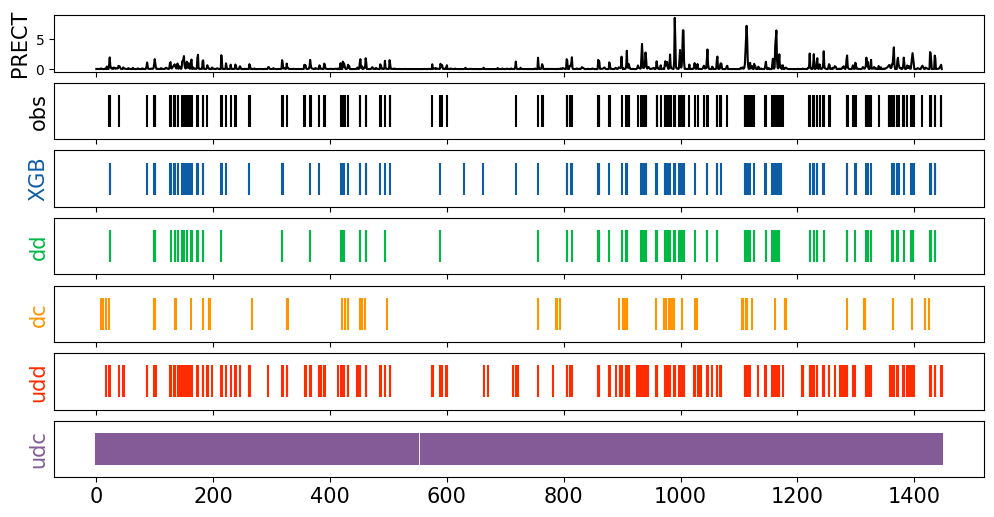

In [24]:
plt.style.use('default')
colors=['#0C5DA5', '#00B945', '#FF9500', '#FF2C00', '#845B97', '#474747', '#9e9e9e']

fig, axes = plt.subplots(nrows=7, ncols=1, sharex=True, figsize=(12,6))
trig_idx = range(len(ts_y_pred))

fh = 15
axes[0].plot(prect_test.values.tolist(), color='k')
axes[0].set_ylabel('PRECT',fontsize=fh)
axes[1].scatter(trig_idx,ts_y_test,color='k', marker='|',s=500)
axes[1].set_ylabel('obs',fontsize=fh)
axes[1].set_yticks([])
axes[2].scatter(trig_idx,ts_y_pred,color=colors[0], marker='|',s=500)
axes[2].set_ylabel('XGB',color=colors[0],fontsize=fh)
axes[2].set_yticks([])
axes[3].scatter(trig_idx,dilute_dcape_pred,color=colors[1], marker='|',s=500)
axes[3].set_ylabel('dd',color=colors[1],fontsize=fh)
axes[3].set_yticks([])
axes[4].scatter(trig_idx,dilute_cape_pred, color=colors[2], marker='|',s=500)
axes[4].set_ylabel('dc',color=colors[2],fontsize=fh)
axes[4].set_yticks([])
axes[5].scatter(trig_idx,undilute_dcape_pred,color=colors[3], marker='|',s=500)
axes[5].set_ylabel('udd',color=colors[3],fontsize=fh)
axes[5].set_yticks([])
axes[6].scatter(trig_idx,undilute_cape_pred,color=colors[4], marker='|',s=500)
axes[6].set_ylabel('udc',color=colors[4],fontsize=fh)
axes[6].set_yticks([])

plt.tick_params(labelsize=fh)

plt.savefig("figs/goamazon_ts.pdf")

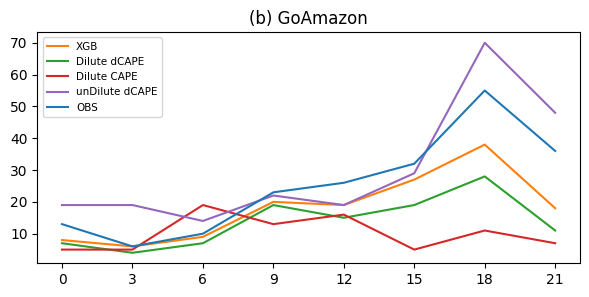

In [25]:
diurnal_prect = np.zeros(24)
diurnal_obs  = np.zeros(24)
diurnal_xgboost  = np.zeros(24)
diurnal_dd  = np.zeros(24)
diurnal_dc  = np.zeros(24)
diurnal_udd  = np.zeros(24)
diurnal_udc  = np.zeros(24)
diurnal_obs  = np.zeros(24)

prect_df = pd.concat([prect_test, hour_test], axis=1)
xgboost_df  = pd.DataFrame({"pred":ts_y_pred, "hour":hour_test})
dd_df = pd.DataFrame({"pred":dilute_dcape_pred, "hour":hour_test})
dc_df = pd.DataFrame({"pred":dilute_cape_pred, "hour":hour_test})
udd_df = pd.DataFrame({"pred":undilute_dcape_pred, "hour":hour_test})
udc_df = pd.DataFrame({"pred":undilute_cape_pred, "hour":hour_test})
obs_df = pd.DataFrame({"pred":ts_y_test, "hour":hour_test})

#for i in [0,3,6,9,12,15,18,21]:
#    diurnal_prect[i] = prect_df[prect_df.hour == i].mean().PRECT
#    diurnal_xgboost[i]  = xgboost_df[xgboost_df.hour == i].mean().pred
#    diurnal_dd[i]  = dd_df[dd_df.hour == i].mean().pred
#    diurnal_dc[i]  = dc_df[dc_df.hour == i].mean().pred
#    diurnal_udd[i]  = udd_df[udd_df.hour == i].mean().pred
#    diurnal_udc[i]  = udc_df[udc_df.hour == i].mean().pred
#    diurnal_obs[i]  = obs_df[obs_df.hour == i].mean().pred
    
    
for i in [0,3,6,9,12,15,18,21]:
    diurnal_prect[i] = prect_df[prect_df.hour == i].sum().PRECT
    diurnal_xgboost[i]  = xgboost_df[xgboost_df.hour == i].sum().pred
    diurnal_dd[i]  = dd_df[dd_df.hour == i].sum().pred
    diurnal_dc[i]  = dc_df[dc_df.hour == i].sum().pred
    diurnal_udd[i]  = udd_df[udd_df.hour == i].sum().pred
    diurnal_udc[i]  = udc_df[udc_df.hour == i].sum().pred
    diurnal_obs[i]  = obs_df[obs_df.hour == i].sum().pred


    
dilurnal_df = pd.DataFrame({"obs":diurnal_obs,"xgboost":diurnal_xgboost, "dilute_dcape":diurnal_dd,"dilute_cape":diurnal_dc
                           ,"undilute_dcape":diurnal_udd})#"undilute_dcape":diurnal_udd, "undilute_cape":diurnal_udc})


#print(dilurnal_df)
#dilurnal_df[dilurnal_df.obs!=0].plot(figsize=(9,3))

diurnal_prect[diurnal_prect==0] = np.nan
s1mask = np.isfinite(diurnal_prect)
#print(diurnal_prect)

#xs = np.arange(24)
#plt.plot(xs[s1mask], diurnal_prect[s1mask], 'ro-', label="PRECT")
#plt.legend(loc = 'upper left',fontsize=8)


fig, ax1 = plt.subplots(figsize=(7,3))
#ax2 = ax1.twinx()
xs = np.arange(24)
ax1.plot(xs[s1mask],diurnal_xgboost[s1mask], color="tab:orange", label="XGB")
ax1.plot(xs[s1mask],diurnal_dd[s1mask], color="tab:green", label="Dilute dCAPE")
ax1.plot(xs[s1mask],diurnal_dc[s1mask], color="tab:red", label="Dilute CAPE")
ax1.plot(xs[s1mask],diurnal_udd[s1mask],color='tab:purple', label="unDilute dCAPE")
ax1.plot(xs[s1mask],diurnal_obs[s1mask], color="tab:blue", label="OBS")

ax1.xaxis.set_ticks(np.arange(0, 24,3)) 

#ax2.plot(xs[s1mask], diurnal_prect[s1mask], '-.', color="tab:blue")
#ax1.plot(np.nan, 'o-', color="tab:blue", label='PRECT')
plt.title("(b) GoAmazon")

ax1.legend(fontsize=7.5)
plt.savefig("figs/goamazon_dilurnal.pdf")

In [81]:
lst_time = np.arange(24) - 4
lst_time[lst_time < 0] += 24

print(lst_time)
print(diurnal_xgboost)

[20 21 22 23  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[ 8.  0.  0.  6.  0.  0.  9.  0.  0. 20.  0.  0. 19.  0.  0. 27.  0.  0.
 38.  0.  0. 18.  0.  0.]


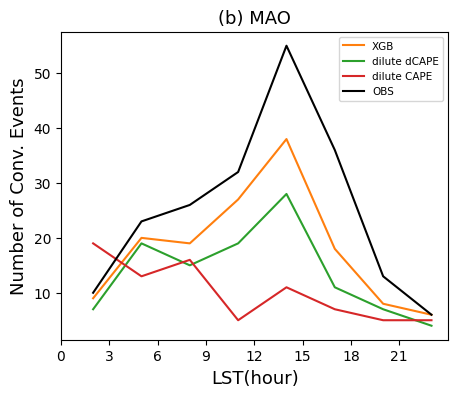

In [26]:
lst_time = np.arange(24) - 4
lst_time[lst_time < 0] += 24

diurnal_xgboost_lst  = np.zeros(24)
diurnal_dd_lst = np.zeros(24)
diurnal_dc_lst = np.zeros(24)
diurnal_obs_lst = np.zeros(24)
diurnal_udd_lst = np.zeros(24)

for i in range(24):
    diurnal_xgboost_lst[lst_time[i]] = diurnal_xgboost[i]
    diurnal_dd_lst[lst_time[i]] = diurnal_dd[i]
    diurnal_dc_lst[lst_time[i]] = diurnal_dc[i]
    diurnal_obs_lst[lst_time[i]] = diurnal_obs[i]
    diurnal_udd_lst[lst_time[i]] = diurnal_udd[i]
    
    
xs = np.arange(24)
diurnal_xgboost_lst[diurnal_xgboost_lst == 0] = np.nan
s1mask = np.isfinite(diurnal_xgboost_lst)
    
fig, ax1 = plt.subplots(figsize=(5,4))
ax1.plot(xs[s1mask],diurnal_xgboost_lst[s1mask], color="tab:orange", label="XGB")
ax1.plot(xs[s1mask],diurnal_dd_lst[s1mask], color="tab:green", label="dilute dCAPE")
ax1.plot(xs[s1mask],diurnal_dc_lst[s1mask], color="tab:red", label="dilute CAPE")
#ax1.plot(xs[s1mask],diurnal_udd_lst[s1mask],color='tab:purple', label="undilute dCAPE")
ax1.plot(xs[s1mask],diurnal_obs_lst[s1mask], color="black", label="OBS")
ax1.xaxis.set_ticks(np.arange(0, 24,3)) 
ax1.tick_params(axis="x", labelsize=10)
ax1.tick_params(axis="y", labelsize=10)

fh=13
ax1.legend(fontsize=7.5)
plt.title("(b) MAO", fontsize=fh)
plt.xlabel("LST(hour)", fontsize=fh)
plt.ylabel("Number of Conv. Events",fontsize=fh)
plt.savefig("figs/goamazon_dilurnal.pdf")

[ 5.  5. 19. 13. 16.  5. 11.  7.]
[19. 13. 16.  5. 11.  7.  5.  5.]


([<matplotlib.axis.XTick at 0x2aac6cae0ad0>,
 <a list of 8 Text xticklabel objects>)

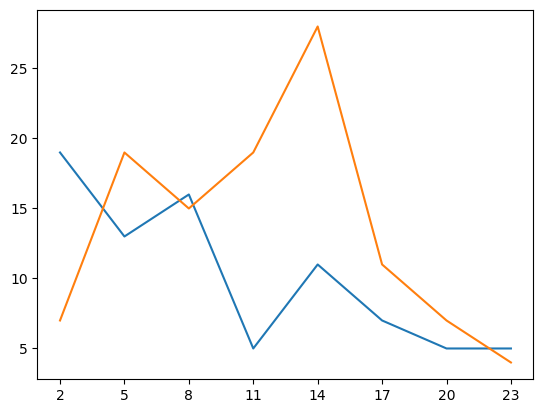

In [63]:
dc_diurnal = np.zeros([8])
dc_diurnal_local = np.zeros([8])
dc_frequent = np.zeros([1448])

dd_diurnal = np.zeros([8])
dd_diurnal_local = np.zeros([8])
dd_frequent = np.zeros([1448])

for i in range(1448):
    if dilute_cape_test[i] > 70:
        dc_frequent[i] = 1
    if dilute_dcape_test[i] > 65:
        dd_frequent[i] = 1

for i in range(8):
    dc_diurnal[i] = np.sum(dc_frequent[i::8])
    dd_diurnal[i] = np.sum(dd_frequent[i::8])

print(dc_diurnal)

dc_diurnal_local[:6] = np.copy(dc_diurnal[2:])
dc_diurnal_local[6:] = np.copy(dc_diurnal[:2])

dd_diurnal_local[:6] = np.copy(dd_diurnal[2:])
dd_diurnal_local[6:] = np.copy(dd_diurnal[:2])

print(dc_diurnal_local)
    
x = [0,1,2,3,4,5,6,7]
labels = ["0","3","6","9","12","15","18","21"]
labels = ["2","5","8","11","14","17","20","23"]
plt.plot(x,dc_diurnal_local)
plt.plot(x,dd_diurnal_local)
plt.xticks(x,labels)

#### dt

In [20]:
from sklearn import tree
trig_x=dataset[['ddcape','lhflx','Q_607']]
#trig_x=dataset[['cape']]
print(trig_x.shape)

trig_x_train,trig_x_test,trig_y_train,trig_y_test= train_test_split(trig_x, trig_y, test_size=0.2, random_state=20)


cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)
dt = tree.DecisionTreeClassifier(max_depth=3)

dt.fit(trig_x_train,trig_y_train)
trig_y_pred = dt.predict(trig_x_test)
tn, fp, fn, tp = confusion_matrix(trig_y_test, trig_y_pred).ravel()
f1 = f1_score(trig_y_test, trig_y_pred,average='macro')
p  = precision_score(trig_y_test, trig_y_pred,average='macro')
r  = recall_score(trig_y_test, trig_y_pred,average='macro')
print(tp,fp,fn,tn)
print(f1,p,r)

(5840, 3)
159 17 38 954
0.9122642888067315 0.9325513196480939 0.8947994374944455


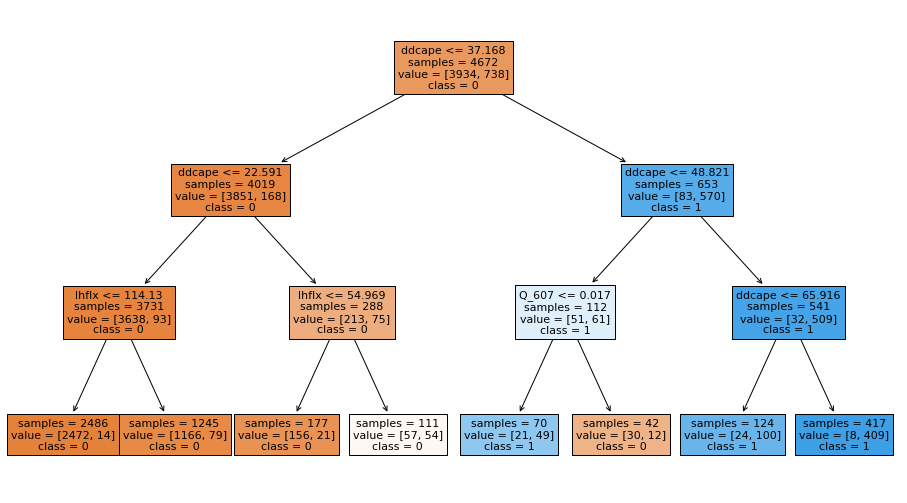

In [21]:
plt.figure(figsize=(16,9))
tree.plot_tree(dt.fit(trig_x_train,trig_y_train), proportion=False, impurity=False,filled=True, feature_names=trig_x.columns, label='all', fontsize=11, class_names=['0','1'])
plt.savefig("figs/MAO_dt.pdf")

445
116 1 3 603
0.9898725311668302 0.9932512482017433 0.9865671434136569


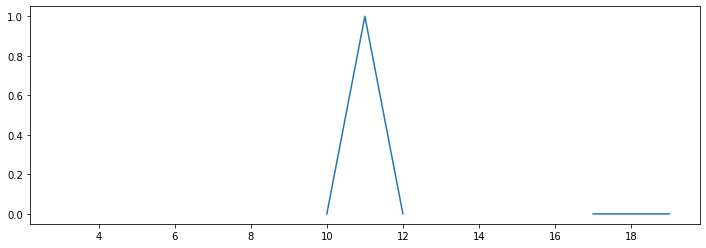

In [91]:
plt.figure(figsize=(12,4))

trig_x_train,trig_x_test,trig_y_train,trig_y_test= train_test_split(trig_x, trig_y, test_size=0.2, random_state=20)
cape_trigger = np.zeros(trig_y_test.shape)

#print(trig_x_test)
j = 0
for i in range(len(trig_y_test)):
    if trig_x_test.iloc[i,4] > 66:
        cape_trigger[i] = 1
    elif trig_x_test.iloc[i,4] < 23 and trig_x_test.iloc[i,trig_x_test.columns.get_loc('lhflx')] < 114:
        cape_trigger[i] = 0
    else:
        cape_trigger[i] = np.nan
        j = j + 1
        
print(j)

plt.plot(cape_trigger[:20])

perf = pd.DataFrame({"real":trig_y_test, "pred":cape_trigger})
perf = perf.dropna()




tn, fp, fn, tp = confusion_matrix(perf.loc[:,"real"], perf.loc[:,"pred"]).ravel()
f1 = f1_score(perf.loc[:,"real"], perf.loc[:,"pred"],average='macro')
p  = precision_score(perf.loc[:,"real"], perf.loc[:,"pred"],average='macro')
r  = recall_score(perf.loc[:,"real"], perf.loc[:,"pred"],average='macro')

print(tp,fp,fn,tn)
print(f1,p,r)

In [13]:
trig_test = pd.concat([trig_x_test, trig_y_test], axis=1)

trig_test_mler = trig_test[((trig_test['ddcape'] < 23) & (trig_test['lhflx'] < 114)) | (trig_test['ddcape'] > 66)]
print(trig_test_mler.shape)

trig_test_mler_x = trig_test_mler.iloc[:,0:86]
trig_test_mler_y = trig_test_mler.iloc[:,86]

f1_scores = cross_val_score(xgb, trig_test_mler_x, trig_test_mler_y, cv=cv, scoring="f1_macro")
p = cross_val_score(xgb, trig_test_mler_x, trig_test_mler_y, cv=cv, scoring="precision_macro")
r = cross_val_score(xgb, trig_test_mler_x, trig_test_mler_y, cv=cv, scoring="recall_macro")
print(f1_scores.mean(), p.mean(), r.mean())

(723, 87)
0.986416070515058 0.9884567013310047 0.9844947965691


In [21]:
real_trigger = np.zeros(trig_test_mler_y.shape)

for i in range(len(trig_test_mler_y)):
    if trig_test_mler_x.iloc[i,4] > 37:
        real_trigger[i] = 1

tn, fp, fn, tp = confusion_matrix(trig_test_mler_y, real_trigger).ravel()
f1 = f1_score(trig_test_mler_y, real_trigger,average='macro')
p  = precision_score(trig_test_mler_y, real_trigger,average='macro')
r  = recall_score(trig_test_mler_y, real_trigger,average='macro')

print(tp,fp,fn,tn)
print(f1,p,r)

116 1 3 603
0.9898725311668302 0.9932512482017433 0.9865671434136569


## joint model

### load date

In [20]:
amazon = load_data.load_arm_hy("../../data/goamazon/trigger_goamazon_hy.nc")
cape_amazon = np.loadtxt("../../data/goamazon/goamazom_undilute_dcape.txt")
lcl_amazon = np.loadtxt("../../data/goamazon/goamazom_undilute_lcl.txt")
amazon['cape'] = cape_amazon
amazon['lcl'] = lcl_amazon
amazon['where'] = 0.0

pos_amazon = amazon[amazon.label==1]
neg_amazon = amazon[amazon.label==0]
print(pos_amazon.shape)
print(neg_amazon.shape)

x_amazon = amazon.iloc[:,0:86]
y_amazon = amazon.iloc[:,86]
x_train_amazon,x_test_amazon,y_train_amazon,y_test_amazon= train_test_split(x_amazon, y_amazon, test_size=0.2, random_state=20)

#cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)
#xgb = XGBClassifier(n_estimators=600,silent=True, nthread=8, max_depth=7,scale_pos_weight=3.5)
#f1_scores = cross_val_score(xgb, x_amazon, y_amazon, cv=cv, scoring="f1_macro")
#print(f1_scores)
#print(f1_scores.mean())

(935, 90)
(4905, 90)


In [21]:
sgp = load_data.load_sgp_data("trigger_sgp_hy.nc")
cape_sgp = np.loadtxt("../../data/sgp/sgp_undilute_cape.txt")
lcl_sgp = np.loadtxt("../../data/sgp/sgp_undilute_lcl.txt")
nsample = sgp.shape[0]

sgp['cape'] = cape_sgp
sgp['lcl'] = lcl_sgp
sgp['where'] = 1.0

pos_sgp = sgp[sgp.label==1]
neg_sgp = sgp[sgp.label==0]
print(pos_sgp.shape)
print(neg_sgp.shape)

x_sgp = sgp.iloc[:,0:86]
y_sgp = sgp.iloc[:,86]
x_train_sgp,x_test_sgp,y_train_sgp,y_test_sgp= train_test_split(x_sgp, y_sgp, test_size=0.2, random_state=20)

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)
xgb = XGBClassifier(n_estimators=600,silent=True, nthread=8, max_depth=7,scale_pos_weight=3.5)
#f1_scores = cross_val_score(xgb, x_sgp, y_sgp, cv=cv, scoring="f1_macro")
#print(f1_scores)
#print(f1_scores.mean())

(2283, 90)
(22725, 90)


### SGP train, amazon test

In [25]:
xgb.fit(x_sgp,y_sgp)
y_pred_amazon = xgb.predict(x_test_amazon)
tn, fp, fn, tp = confusion_matrix(y_test_amazon, y_pred_amazon).ravel()
f1 = f1_score(y_test_amazon, y_pred_amazon,average='macro')
P  = precision_score(y_test_amazon, y_pred_amazon,average='macro')
R  = recall_score(y_test_amazon, y_pred_amazon,average='macro')
print(tn,fp,fn,tp)
print(f1, P, R)

402 569 69 128
0.421956206735 0.518573687048 0.531876186045


### amazon train, SGP test

In [26]:
xgb.fit(x_amazon,y_amazon)
y_pred_sgp = xgb.predict(x_test_sgp)
tn, fp, fn, tp = confusion_matrix(y_test_sgp, y_pred_sgp).ravel()
f1 = f1_score(y_test_sgp, y_pred_sgp,average='macro')
P  = precision_score(y_test_sgp, y_pred_sgp,average='macro')
R  = recall_score(y_test_sgp, y_pred_sgp,average='macro')
print(tn,fp,fn,tp)
print(f1, P, R)

4552 0 450 0
0.476449654595 0.455017992803 0.5


/global/common/cori/software/python/3.6-anaconda-5.2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/global/common/cori/software/python/3.6-anaconda-5.2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### joint train, joint test

In [28]:
joint = pd.concat([amazon,sgp])

pos_joint = joint[joint.label==1]
neg_joint = joint[joint.label==0]
print(pos_joint.shape)
print(neg_joint.shape)

x_joint = joint.iloc[:,0:86]
y_joint = joint.iloc[:,86]
x_train_joint,x_test_joint,y_train_joint,y_test_joint= train_test_split(joint, y_joint, test_size=0.2, random_state=20)


cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)
xgb = XGBClassifier(n_estimators=600,silent=True, nthread=8, max_depth=7,scale_pos_weight=3.5)

xgb.fit(x_train_joint.iloc[:,0:86],y_train_joint)
y_pred_joint = xgb.predict(x_test_joint.iloc[:,0:86])
tn, fp, fn, tp = confusion_matrix(y_test_joint, y_pred_joint).ravel()
f1 = f1_score(y_test_joint, y_pred_joint,average='macro')
P  = precision_score(y_test_joint, y_pred_joint,average='macro')
R  = recall_score(y_test_joint, y_pred_joint,average='macro')
print(tp,fp,fn,tn)
print(f1, P, R)

(3218, 90)
(27630, 90)
525 64 116 5465
0.918728458212 0.935278225388 0.903728715616


### joint train, sgp test

In [29]:
x_joint_train = np.concatenate((x_train_sgp, x_train_amazon), axis=0)
y_joint_train = np.concatenate((y_train_sgp, y_train_amazon), axis=0)
xgb.fit(x_joint_train, y_joint_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=600,
       n_jobs=1, nthread=8, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=3.5, seed=None,
       silent=True, subsample=1)

In [30]:
y_pred_sgp = xgb.predict(x_test_sgp.values)
tn, fp, fn, tp = confusion_matrix(y_test_sgp, y_pred_sgp).ravel()
f1 = f1_score(y_test_sgp, y_pred_sgp,average='macro')
P = precision_score(y_test_sgp, y_pred_sgp,average='macro')
R = recall_score(y_test_sgp, y_pred_sgp,average='macro')
print(tp,fp,fn,tn)
print(f1, P, R)

393 35 57 4517
0.942567656953 0.952881279397 0.932822202695


### joint train, goamazon test

In [31]:
y_pred_amazon = xgb.predict(x_test_amazon.values)
tn, fp, fn, tp = confusion_matrix(y_test_amazon, y_pred_amazon).ravel()
f1 = f1_score(y_test_amazon, y_pred_amazon,average='macro')
P = precision_score(y_test_amazon, y_pred_amazon,average='macro')
R = recall_score(y_test_amazon, y_pred_amazon,average='macro')
print(tp,fp,fn,tn)
print(f1, P, R)

153 31 44 940
0.882393217472 0.893403145988 0.872361948277


In [91]:
confusions = []
for pred in zip(y_test_joint, y_pred_joint):
    if pred[0] == 1 and pred[1] == 1:
        confusions.append("TP")
    if pred[0] == 1 and pred[1] == 0:
        confusions.append("FN")
    if pred[0] == 0 and pred[1] == 1:
        confusions.append("FP")
    if pred[0] == 0 and pred[1] == 0:
        confusions.append("TN")

x_test_joint['confusion'] = confusions
a1 = x_test_joint.loc[(x_test_joint['confusion'] == 'TP') & (x_test_joint['where'] == 1)]
a2 = x_test_joint.loc[(x_test_joint['confusion'] == 'TP') & (x_test_joint['where'] == 0)]
print(a1.shape)
print(a2.shape)

b1 = x_test_joint.loc[(x_test_joint['confusion'] == 'TN') & (x_test_joint['where'] == 1)]
b2 = x_test_joint.loc[(x_test_joint['confusion'] == 'TN') & (x_test_joint['where'] == 0)]
print(b1.shape)
print(b2.shape)

(388, 91)
(137, 91)
(4515, 91)
(950, 91)


/R1/zhangtao/soft/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [70]:
x_test_joint_sgp = x_test_joint.loc[x_test_joint["where"] == 1] #sgp
x_test_joint_amazon = x_test_joint.loc[x_test_joint["where"] == 0] #goamazon
print(x_test_joint_sgp.shape)
print(x_test_joint_amazon.shape)

(5004, 90)
(1166, 90)


## VS oversampling

In [9]:
trig_x_train,trig_x_test,trig_y_train,trig_y_test= train_test_split(trig_x, trig_y, test_size=0.2, random_state=20)
xgb = XGBClassifier(n_estimators=620,silent=True, nthread=8, max_depth=7,  random_state=10,scale_pos_weight=30.5)

xgb.fit(trig_x_train,trig_y_train)
trig_y_pred = xgb.predict(trig_x_test)
tn, fp, fn, tp = confusion_matrix(trig_y_test, trig_y_pred).ravel()
f1 = f1_score(trig_y_test, trig_y_pred,average='macro')
print(tn,fp,fn,tp)
print(f1)

899 72 89 108
0.7453797544625025


In [11]:
smt = SMOTETomek(ratio=0.2)
#smt = SMOTETomek(ratio=0.9)
trig_x1, trig_y1 = smt.fit_sample(trig_x_train, trig_y_train)

xgb = XGBClassifier(n_estimators=600,silent=True, nthread=8, max_depth=7,random_state=0)
xgb.fit(trig_x1,trig_y1)
trig_y_pred = xgb.predict(trig_x_test.values)
tn, fp, fn, tp = confusion_matrix(trig_y_test, trig_y_pred).ravel()
f1 = f1_score(trig_y_test, trig_y_pred,average='macro')
print(tn,fp,fn,tp)
print(f1)

940 31 144 53
0.6460330242183373


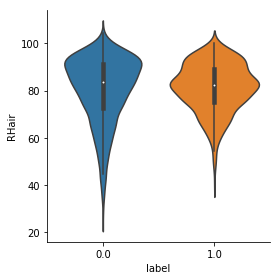

In [5]:
g = sns.factorplot(x="label", y = "RHair",data = dataset, kind="violin")

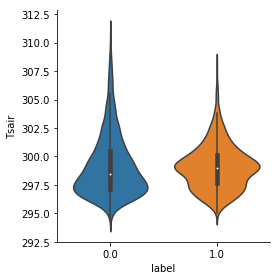

In [6]:
g = sns.factorplot(x="label", y = "Tsair",data = dataset, kind="violin")

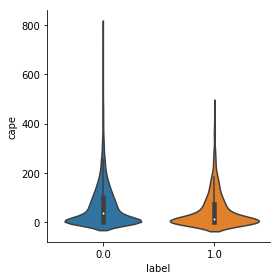

In [7]:
g = sns.factorplot(x="label", y = "cape",data = dataset, kind="violin")

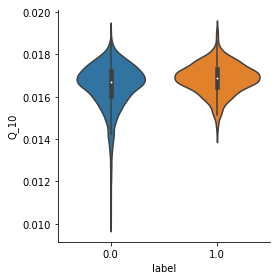

In [8]:
g = sns.factorplot(x="label", y = "Q_10",data = dataset, kind="violin")

In [9]:
trig_x_train,trig_x_test,trig_y_train,trig_y_test= train_test_split(trig_x, trig_y, test_size=0.2, random_state=10)

In [11]:
kfold = StratifiedKFold(n_splits=10)
random_state = 2
classifiers = []
#classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())
classifiers.append(XGBClassifier(n_estimators=600,silent=True, nthread=8, max_depth=7))

cv_results = []
for classifier in classifiers :
    print(classifier)
    cv_results.append(cross_val_score(classifier, trig_x_train, y = trig_y_train, scoring = "f1_macro", cv = kfold, n_jobs=4))
print(cv_results)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=2,
            splitter='best')
AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=2,
            splitter='best'),
          learning_rate=0.1, n_estimators=50, random_state=2)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decreas

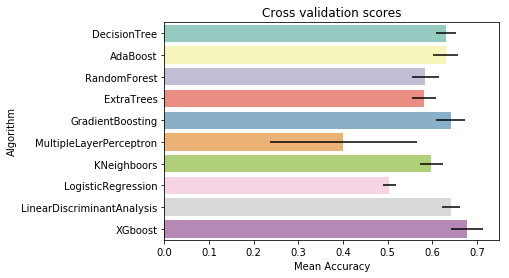

In [12]:
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis","XGboost"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [13]:
# Adaboost
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7, n_estimators=600)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="f1_macro", n_jobs= 8, verbose = 1)

gsadaDTC.fit(trig_x_train,trig_y_train)

ada_best = gsadaDTC.best_estimator_

Fitting 10 folds for each of 56 candidates, totalling 560 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    3.9s
[Parallel(n_jobs=8)]: Done 217 tasks      | elapsed:   17.8s
[Parallel(n_jobs=8)]: Done 545 out of 560 | elapsed:   35.4s remaining:    1.0s
[Parallel(n_jobs=8)]: Done 560 out of 560 | elapsed:   37.5s finished


In [16]:
print(gsadaDTC.best_score_)

0.6314123939200252


In [17]:
#ExtraTrees 
ExtC = ExtraTreesClassifier(n_estimators=600)


## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 8, verbose = 1)

gsExtC.fit(trig_x_train,trig_y_train)

ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_
print(ExtC_best)

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    5.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   15.3s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:   55.6s
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed:  1.3min finished


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features=10, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


In [18]:
# RFC Parameters tunning 
RFC = RandomForestClassifier(n_estimators=600)


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="f1", n_jobs= 8, verbose = 1)

gsRFC.fit(trig_x_train,trig_y_train)

RFC_best = gsRFC.best_estimator_

# Best score
print(gsRFC.best_score_)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   31.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:  4.0min
[Parallel(n_jobs=8)]: Done 270 out of 270 | elapsed: 10.2min finished


0.34524540852391994


In [20]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier(n_estimators=600)
gb_param_grid = {'loss' : ["deviance"],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="f1_macro", n_jobs= 8, verbose = 1)

gsGBC.fit(trig_x_train,trig_y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   42.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:  4.0min
[Parallel(n_jobs=8)]: Done 240 out of 240 | elapsed:  5.1min finished


0.6959718140468552

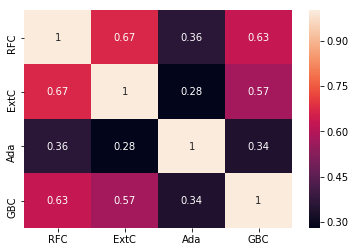

In [18]:
test_Survived_RFC = pd.Series(RFC_best.predict(trig_x_test), name="RFC")
test_Survived_ExtC = pd.Series(ExtC_best.predict(trig_x_test), name="ExtC")
test_Survived_AdaC = pd.Series(ada_best.predict(trig_x_test), name="Ada")
test_Survived_GBC = pd.Series(GBC_best.predict(trig_x_test), name="GBC")


# Concatenate all classifier results
ensemble_results = pd.concat([test_Survived_RFC,test_Survived_ExtC,test_Survived_AdaC,test_Survived_GBC],axis=1)


g= sns.heatmap(ensemble_results.corr(),annot=True)

In [26]:
xgb = XGBClassifier(n_estimators=600,silent=True, max_depth=7)
dt = DecisionTreeClassifier(random_state=random_state)
knn = KNeighborsClassifier()
ld = LinearDiscriminantAnalysis()


votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('extc', ExtC_best), ('adac',ada_best),
                                       ('gbc',GBC_best),('xgb',xgb),('dt',dt),
                                       ('knn',knn),('ld',ld)], voting='soft', n_jobs=8)

votingC = votingC.fit(trig_x_train, trig_y_train)
trig_y_prec = votingC.predict(trig_x_test)
print(f1_score(trig_y_test, trig_y_prec,average='macro'))

0.6560533748734543


## Test with the ERA-Interim and TRMM data

In [107]:
dataset_trmm = load_data.load_era_trmm()
print(dataset_trmm.shape)
print(dataset_trmm.dtypes)

(20451, 120)
t2m       float64
d2m       float64
sp        float64
cape      float64
lcl       float64
clabel    float64
t_100     float64
t_125     float64
t_150     float64
t_175     float64
t_200     float64
t_225     float64
t_250     float64
t_300     float64
t_350     float64
t_400     float64
t_450     float64
t_500     float64
t_550     float64
t_600     float64
t_650     float64
t_700     float64
t_750     float64
t_775     float64
t_800     float64
t_825     float64
t_850     float64
t_875     float64
t_900     float64
t_925     float64
           ...   
w_175     float64
w_200     float64
w_225     float64
w_250     float64
w_300     float64
w_350     float64
w_400     float64
w_450     float64
w_500     float64
w_550     float64
w_600     float64
w_650     float64
w_700     float64
w_750     float64
w_775     float64
w_800     float64
w_825     float64
w_850     float64
w_875     float64
w_900     float64
w_925     float64
w_950     float64
w_975     float64
w_1000    float

(1727, 120)
(18724, 120)


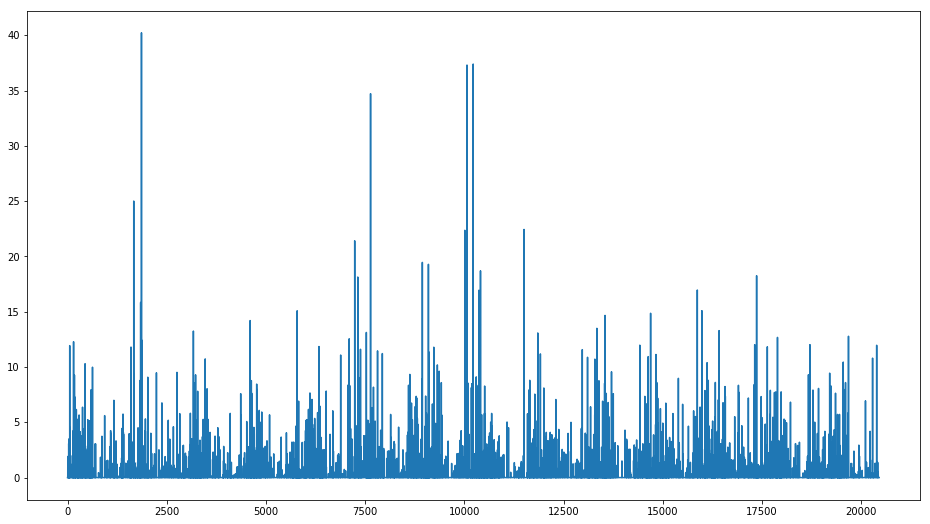

In [109]:
trig_x = dataset_trmm.iloc[:,0:114]
trig_y = dataset_trmm.iloc[:,114]
plt.figure(figsize=(16,9))
dataset_trmm['prect'].plot()

pos = dataset_trmm[dataset_trmm.label==1]
neg = dataset_trmm[dataset_trmm.label==0]
print(pos.shape)
print(neg.shape)

In [111]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)
xgb = XGBClassifier(n_estimators=600,silent=True, nthread=8, max_depth=7,scale_pos_weight=55.5)
f1_scores = cross_val_score(xgb, trig_x, trig_y, cv=cv, scoring="f1_macro")
print(f1_scores)

[0.63035183 0.63354869 0.65828954 0.62831603 0.64153719]


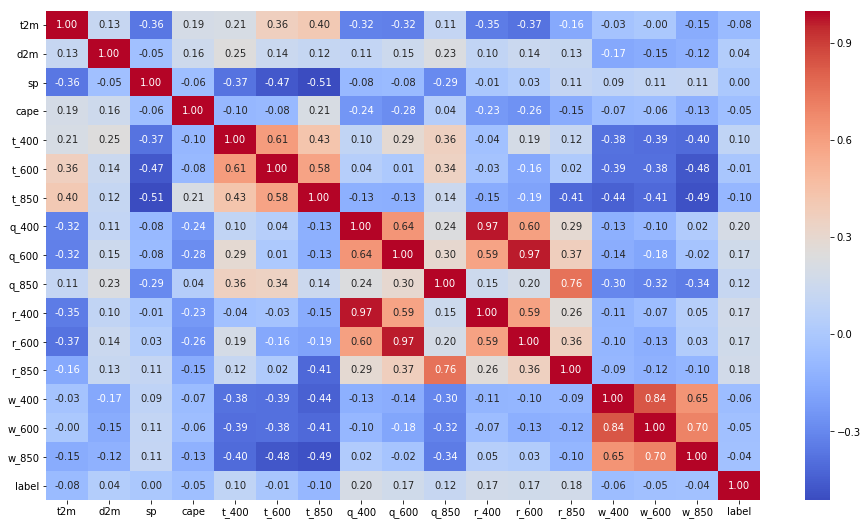

In [13]:
plt.figure(figsize=(16,9))
g = sns.heatmap(dataset[["t2m","d2m","sp","cape","t_400","t_600","t_850", "q_400","q_600", "q_850",
                         "r_400","r_600", "r_850",
                         "w_400","w_600", "w_850","label"]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

## Test with ori data

In [7]:
a = load_data.load_goamazon_data()
dataset= a[a.lhflx > 400]

pos = dataset[dataset.label==1]
neg = dataset[dataset.label==0]
print(pos.shape)
print(neg.shape)

trig_x = dataset.iloc[:,0:150]
trig_y = dataset.iloc[:,150]

print(dataset.shape)
#plt.plot(trig_y)

(28, 153)
(78, 153)
(106, 153)


In [44]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)
xgb = XGBClassifier(n_estimators=1000,silent=True, nthread=8, max_depth=7,scale_pos_weight=5.5)
f1_scores = cross_val_score(xgb, trig_x, trig_y, cv=cv, scoring="f1_macro")
print(f1_scores)

[0.71078393 0.74166312 0.72720766 0.72476515 0.7288567 ]


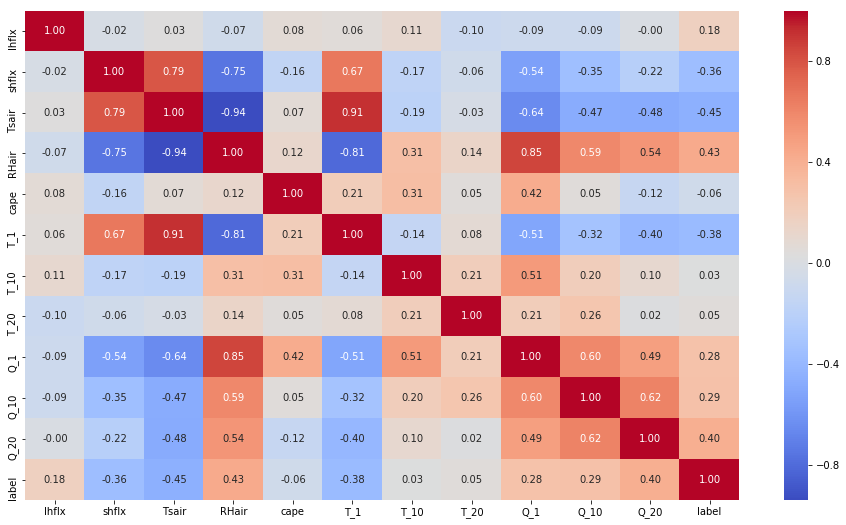

In [23]:
plt.figure(figsize=(16,9))
g = sns.heatmap(dataset[["lhflx","shflx","Tsair","RHair","cape","T_1","T_10","T_20", "Q_1","Q_10", "Q_20","label"]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

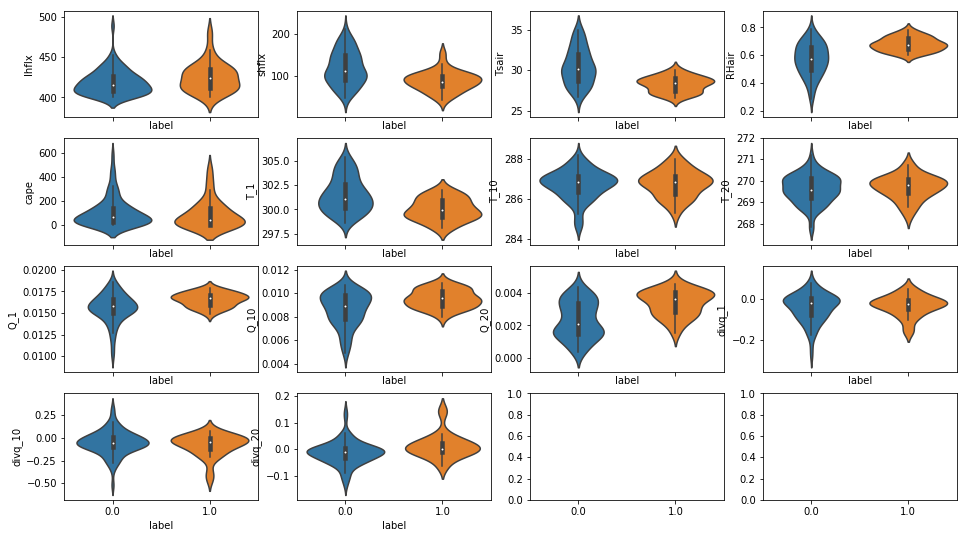

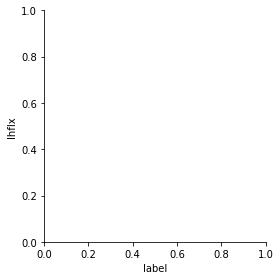

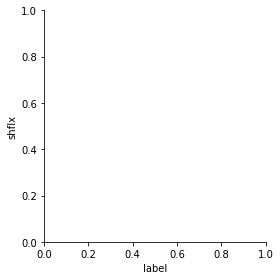

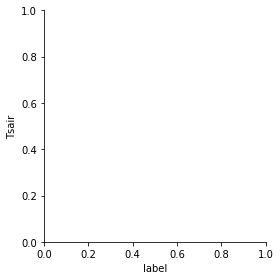

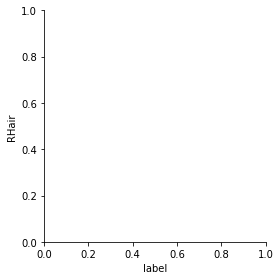

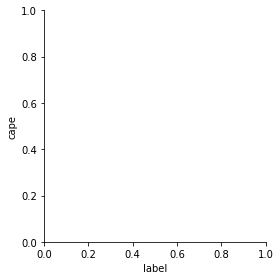

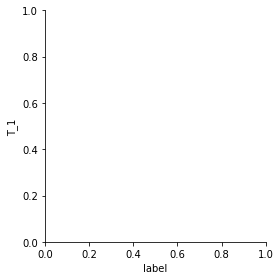

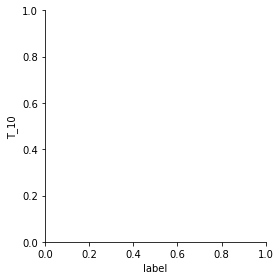

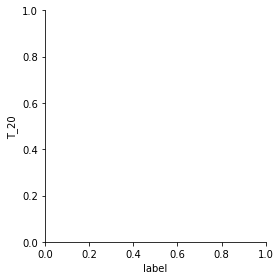

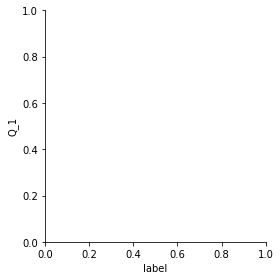

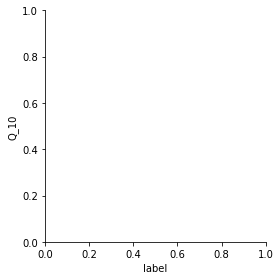

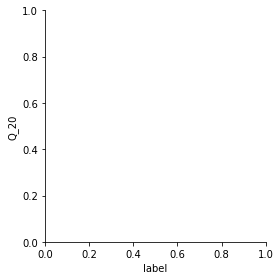

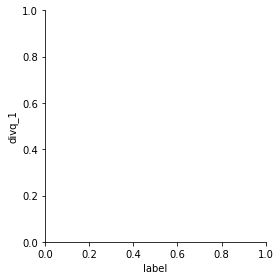

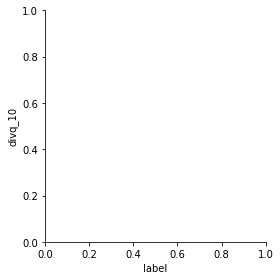

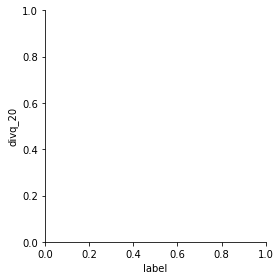

In [8]:
f, axes = plt.subplots(4, 4, figsize=(16, 9), sharex=True)
#vars_name = ["lhflx","shflx","Tsair","RHair","cape","T_1","T_10","T_20", "Q_1","Q_10", "Q_20","divq_1","divq_10", "divq_20"]
for id in range(len(vars_name)):
    g = sns.factorplot(x="label", y = vars_name[id],data = dataset, kind="violin",ax=axes[id//4, id%4])

## Test with forcing data

In [20]:
dataset = load_data.load_forcing("../../data/goamazon/GOAMAZON_iopfile_4scam.nc")
cape = np.loadtxt("/R0/wlin/Tao/CPS_trigger/data/goamazon/dilute_cape.txt")
dataset['cape'] = cape
trig_x = dataset.iloc[:,2:148]
trig_y = dataset.iloc[:,1]

In [23]:
trig_x_train,trig_x_test,trig_y_train,trig_y_test= train_test_split(trig_x, trig_y, test_size=0.2,shuffle=False)
print(trig_x_train.shape)
print(trig_x_test.shape)

(42035, 146)
(10509, 146)


In [25]:
xgb = XGBClassifier(n_estimators=600,silent=True, nthread=8, max_depth=7)

### cross validation

In [5]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)
f1_scores = cross_val_score(xgb, trig_x, trig_y, cv=cv, scoring="f1_macro")
print(f1_scores)

[0.96487267 0.96666698 0.96726366 0.96912171 0.96844716]


### confusion repost

In [26]:
xgb.fit(trig_x_train,trig_y_train)
trig_y_pred = xgb.predict(trig_x_test)
tn, fp, fn, tp = confusion_matrix(trig_y_test, trig_y_pred).ravel()
f1 = f1_score(trig_y_test, trig_y_pred,average='macro')

print(tn,fp,fn,tp)
print(f1)

8973 23 1356 157
0.5570556182561326


In [7]:
pos = dataset[dataset.label==1]
neg = dataset[dataset.label==0]
print(pos.shape)
print(neg.shape)

(8687, 148)
(43857, 148)


### importance

In [ ]:
importance = xgb.feature_importances_
name = dataset.columns.values.tolist()
imp_df = pd.DataFrame(importance,columns=['imp'])
imp_df['name'] = name[0:86]
imp_df.set_index('name',inplace=True)
imp_df.sort_values('imp',inplace=True,ascending=False)
print(imp_df)

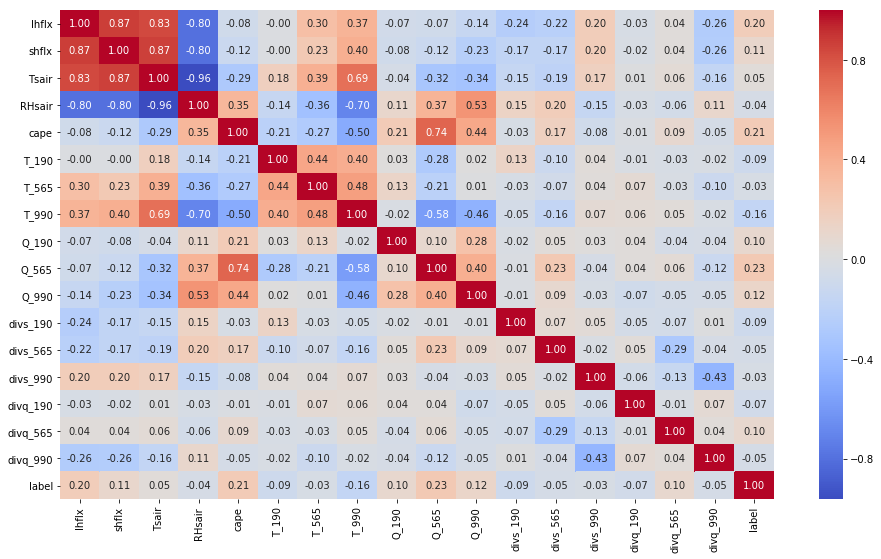

In [5]:
plt.figure(figsize=(16,9))
g = sns.heatmap(dataset[["lhflx","shflx","Tsair","RHsair",'cape',"T_190","T_565","T_990", "Q_190","Q_565", "Q_990",
                         'divs_190',"divs_565", "divs_990",'divq_190',"divq_565", "divq_990","label"]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

### dilute cape performance

In [6]:
cape = trig_x_test.loc[:,'cape'].tolist()
ntime = len(cape)
dlabel = np.zeros(ntime)
for i in range(ntime):
    if cape[i] > 70: 
        dlabel[i] = 1 
    else:
        dlabel[i] = 0 

tn, fp, fn, tp = confusion_matrix(trig_y_test, dlabel).ravel()
f1 = f1_score(trig_y_test, dlabel,average='macro')

a = tp
b = fp
c = fn
d = tn  
hss  = my_metrics.hss_score(a,b,c,d)
seds = my_metrics.seds_score(a,b,c,d)
ets  = my_metrics.ets_score(a,b,c,d)

print(tn,fp,fn,tp)
print(f1)
print(hss,seds,ets)


2582 6182 106 1639
0.39679878285892756
0.09767636814277735 0.12526001013938481 0.05134582071475227


### dilute dcape performance

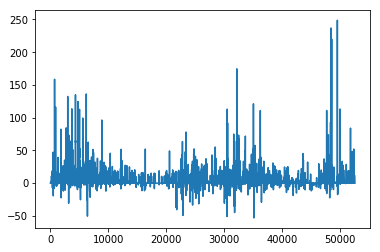

In [15]:
ddcape = np.loadtxt("/R0/wlin/Tao/CPS_trigger/data/goamazon/ddcape.txt")
dataset['cape'] = ddcape
dataset['cape'].plot()
trig_x = dataset.iloc[:,2:148]
trig_y = dataset.iloc[:,1]

In [16]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)
xgb = XGBClassifier(n_estimators=600,silent=True, nthread=8, max_depth=7,scale_pos_weight=3.5)
#f1_scores = cross_val_score(xgb, trig_x, trig_y, cv=cv, scoring="f1_macro")
#print(f1_scores)

/R1/zhangtao/soft/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


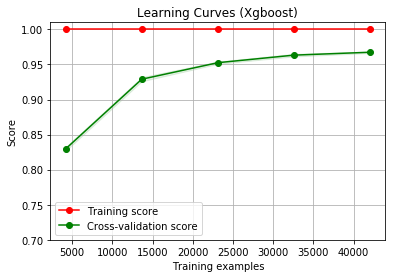

In [9]:
import plot_learning_curve
title = "Learning Curves (Xgboost)"
g = plot_learning_curve.plot_learning_curve(xgb,title,trig_x, trig_y,ylim=(0.7, 1.01), cv=cv, n_jobs=8)

In [18]:
trig_x_train,trig_x_test,trig_y_train,trig_y_test= train_test_split(trig_x, trig_y, test_size=0.2, random_state=20)
ddcape = trig_x_test.loc[:,'cape'].tolist()
ntime = len(ddcape)
ddlabel = np.zeros(ntime)
for i in range(ntime):
    if ddcape[i] > 0: 
        ddlabel[i] = 1 
    else:
        ddlabel[i] = 0


tn, fp, fn, tp = confusion_matrix(trig_y_test, ddlabel).ravel()
f1 = f1_score(trig_y_test, ddlabel,average='macro')

a = tp
b = fp
c = fn
d = tn  
hss  = my_metrics.hss_score(a,b,c,d)
seds = my_metrics.seds_score(a,b,c,d)
ets  = my_metrics.ets_score(a,b,c,d)

print(tn,fp,fn,tp)
print(f1)
print(hss,seds,ets)

6792 1972 820 925
0.6140208545960114
0.2412872404004029 0.2690486156627141 0.13719536580569092


In [23]:
print(len(trig_x_train))
print(len(trig_x_test))
print(sum(trig_y_train))
print(sum(trig_y_test))

42035
10509
6942.0
1745.0


### diag 

Text(0.5,1,'RHsair')

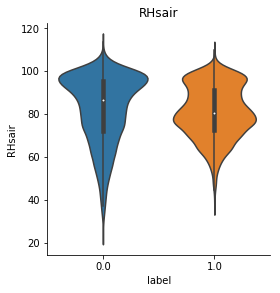

In [3]:
g = sns.factorplot(x="label", y = "RHsair",data = dataset, kind="violin")
plt.title("RHsair")

Text(0.5,1,'lhflx')

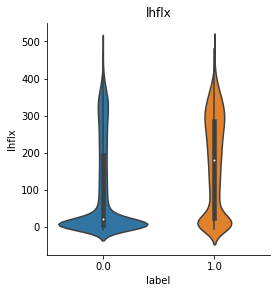

In [7]:
g = sns.factorplot(x="label", y = "lhflx",data = dataset, kind="violin")
plt.title("lhflx")

Text(0.5,1,'shflx')

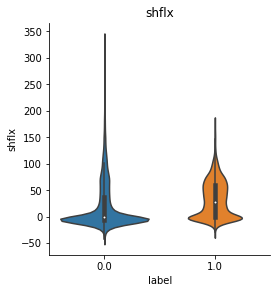

In [8]:
g = sns.factorplot(x="label", y = "shflx",data = dataset, kind="violin")
plt.title("shflx")

Text(0.5,1,'Tsair')

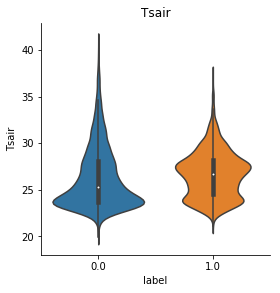

In [9]:
g = sns.factorplot(x="label", y = "Tsair",data = dataset, kind="violin")
plt.title('Tsair')

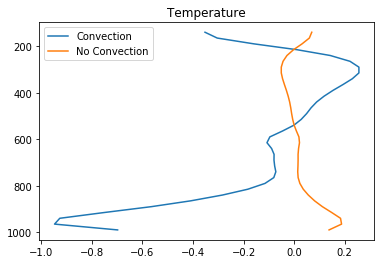

In [12]:
var_mean = dataset.mean()[8:8+35]
pos = dataset[dataset.label==1]
neg = dataset[dataset.label==0]

var_pos = pos.iloc[:,8:8+35]
var_neg = neg.iloc[:,8:8+35]

var_pos_anorm = var_pos.mean() - var_mean
var_neg_anorm = var_neg.mean() - var_mean

lev = np.loadtxt("lev_goamazon.txt")
plt.plot(var_pos_anorm, lev, label="Convection")
plt.plot(var_neg_anorm, lev, label="No Convection")
plt.gca().invert_yaxis()
plt.title("Temperature")
plt.legend()

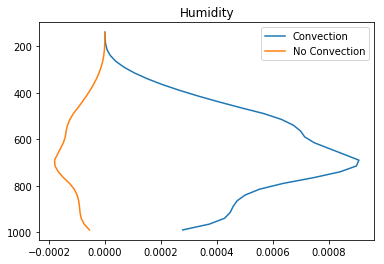

In [13]:
var_mean = dataset.mean()[43:43+35]
pos = dataset[dataset.label==1]
neg = dataset[dataset.label==0]

var_pos = pos.iloc[:,43:43+35]
var_neg = neg.iloc[:,43:43+35]

var_pos_anorm = var_pos.mean() - var_mean
var_neg_anorm = var_neg.mean() - var_mean

lev = np.loadtxt("lev_goamazon.txt")
plt.plot(var_pos_anorm, lev, label="Convection")
plt.plot(var_neg_anorm, lev, label="No Convection")
plt.gca().invert_yaxis()
plt.title("Humidity")
plt.legend()

In [ ]:
! pip install --user keras 